In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data Cleaning

In [4]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [5]:
strings = list(df.dtypes[df.dtypes=='object'].index)
strings

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [6]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ' ,'_')

In [7]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,male,67.0,0,1,yes,private,urban,228.69,36.6,formerly_smoked,1
1,51676,female,61.0,0,0,yes,self-employed,rural,202.21,NaN,never_smoked,1
2,31112,male,80.0,0,1,yes,private,rural,105.92,32.5,never_smoked,1
3,60182,female,49.0,0,0,yes,private,urban,171.23,34.4,smokes,1
4,1665,female,79.0,1,0,yes,self-employed,rural,174.12,24.0,never_smoked,1


In [8]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

id
[ 9046 51676 31112 60182  1665]
5110

gender
['male' 'female' 'other']
3

age
[67. 61. 80. 49. 79.]
104

hypertension
[0 1]
2

heart_disease
[1 0]
2

ever_married
['yes' 'no']
2

work_type
['private' 'self-employed' 'govt_job' 'children' 'never_worked']
5

Residence_type
['urban' 'rural']
2

avg_glucose_level
[228.69 202.21 105.92 171.23 174.12]
3979

bmi
[36.6  nan 32.5 34.4 24. ]
418

smoking_status
['formerly_smoked' 'never_smoked' 'smokes' 'unknown']
4

stroke
[1 0]
2



In [9]:
# Check missing values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
# replace missing values with zero
df.fillna(0,inplace=True)

In [11]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
df.gender.value_counts()

gender
female    2994
male      2115
other        1
Name: count, dtype: int64

In [13]:
# Deleting rows where where gender column equals 'other'
df = df[df['gender'] != 'other']

In [14]:
df.gender.value_counts()

gender
female    2994
male      2115
Name: count, dtype: int64

In [15]:
numerical_features = df[['bmi', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'stroke']]

In [16]:
corrolation_matrix=numerical_features.corr()

In [17]:
max_corr = corrolation_matrix.abs().unstack().sort_values(ascending=False)
top_corr = max_corr[max_corr <1].head(2)

print(top_corr)

age           hypertension    0.276367
hypertension  age             0.276367
dtype: float64


<Axes: xlabel='count', ylabel='age'>

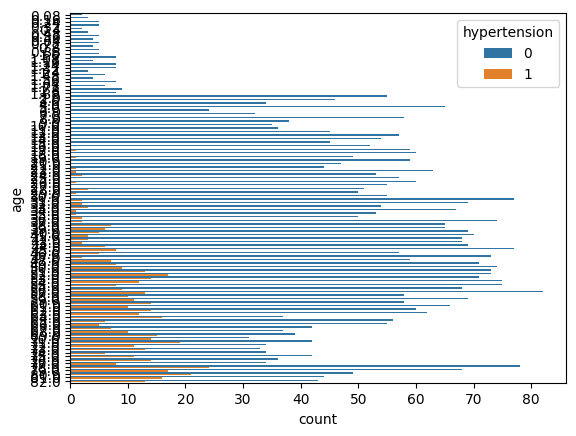

In [18]:
# plot between mode_of_shipment and reached_on_time_y_n
sns.countplot(y=df['age'], hue=df['hypertension'])



# Setting Up Validation Frame Work

In [18]:
# Perform train/validation/test using sklearn
from sklearn.model_selection import train_test_split

In [19]:
# Divide the data into train,validation,test
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state=42)

In [20]:
len(df_full_train), len(df_test)

(4087, 1022)

In [21]:
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state=42)

In [22]:
len(df_train), len(df_val), len(df_test)

(3065, 1022, 1022)

In [23]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [24]:
y_train = df_train.stroke.values
y_val = df_val.stroke.values
y_test = df_test.stroke.values

In [25]:
del df_train['stroke']
del df_val['stroke']
del df_test['stroke']

# Data Analysis


In [26]:
df_full_train = df_full_train.reset_index(drop=True)

In [27]:
# calculate the stroke rate
df_full_train.stroke.value_counts(normalize = True)

stroke
0    0.954245
1    0.045755
Name: proportion, dtype: float64

In [28]:
global_stroke_rate= df_full_train.stroke.mean()
round(global_stroke_rate, 2)

0.05

In [38]:
categorical_features=['smoking_status', 'Residence_type', 'ever_married', 'gender']

# Mutual Information

In [29]:
# mutual information : concept from information theory that tells how much we can learn about value
from sklearn.metrics import mutual_info_score

In [30]:
mutual_info_score(df_full_train.stroke, df_full_train.age)

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.04318865457196639

In [31]:
mutual_info_score(df_full_train.stroke, df_full_train.gender)

2.5293469424911286e-05

In [32]:
# apply mutual information to the wholle data
def mutual_info_stroke_score(series):
    return mutual_info_score(series, df_full_train.stroke)

In [39]:
mi = df_full_train[categorical_features].apply(mutual_info_stroke_score)

In [40]:
mi.sort_values(ascending=False)

ever_married      0.005587
smoking_status    0.002223
Residence_type    0.000128
gender            0.000025
dtype: float64

# One Hot Encoding

In [45]:
from sklearn.feature_extraction import DictVectorizer

In [46]:
train_dicts = df_train.to_dict(orient='records')

In [47]:
train_dicts[0]

{'id': 45701,
 'gender': 'female',
 'age': 72.0,
 'hypertension': 0,
 'heart_disease': 1,
 'ever_married': 'no',
 'work_type': 'self-employed',
 'Residence_type': 'rural',
 'avg_glucose_level': 124.38,
 'bmi': 23.4,
 'smoking_status': 'formerly_smoked'}

In [48]:
dv = DictVectorizer(sparse=False)

In [50]:
X_train = dv.fit_transform(train_dicts)

In [51]:
val_dicts = df_val.to_dict(orient='records')

In [52]:
X_val = dv.transform(val_dicts)

# Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
model = LogisticRegression(solver = 'liblinear', C = 10, max_iter=1000,random_state=42)

In [57]:
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [58]:
model.intercept_[0]

-0.06427458793190914

In [59]:
# this is the weight
model.coef_[0].round(3)

array([-0.031, -0.033,  0.028, -0.009, -0.101, -0.048, -0.017, -0.045,
       -0.02 ,  0.011,  0.021, -0.   ,  0.006, -0.016, -0.013, -0.042,
       -0.026, -0.003, -0.001, -0.027, -0.007])

In [60]:
# Hard prediction predict 0 and 1
model.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
# soft prediction
model.predict_proba(X_train)

array([[0.90512393, 0.09487607],
       [0.94574171, 0.05425829],
       [0.95263651, 0.04736349],
       ...,
       [0.97476365, 0.02523635],
       [0.99594764, 0.00405236],
       [0.97800171, 0.02199829]])

In [62]:
# using it on validation dataset
y_pred = model.predict_proba(X_val)[:,1]

In [63]:
stroke_decision = (y_pred>= 0.5)

In [64]:
accuracy = (y_val==stroke_decision).mean()

In [65]:
print(round(accuracy, 2))

0.95


In [68]:
df_pred = pd.DataFrame()
df_pred['probability']= y_pred
df_pred['prediction'] = stroke_decision.astype(int)
df_pred['actual'] = y_val
df_pred['correct'] = df_pred.prediction==df_pred.actual

In [69]:
df_pred

,probability,prediction,actual,correct
0,0.028292,0,0,True
1,0.349833,0,1,False
2,0.050223,0,0,True
3,0.047607,0,0,True
4,0.002406,0,0,True
...,...,...,...,...
1017,0.672287,1,0,False
1018,0.047132,0,0,True
1019,0.070792,0,0,True
1020,0.013647,0,0,True


In [70]:
len(X_val)

1022

In [71]:
(y_val == stroke_decision).sum()

970

In [72]:
970/1022

0.949119373776908

In [74]:
thresholds=np.linspace(0, 1,21)
scores= []
for t in thresholds:
    stroke_decision = (y_pred >=t)
    score = (y_val == stroke_decision).mean()
    print('%.2f%.3f'%(t, score))
    scores.append(score)

0.000.040
0.050.638
0.100.861
0.150.906
0.200.924
0.250.937
0.300.940
0.350.941
0.400.946
0.450.947
0.500.949
0.550.953
0.600.952
0.650.957
0.700.959
0.750.960
0.800.960
0.850.960
0.900.960
0.950.960
1.000.960


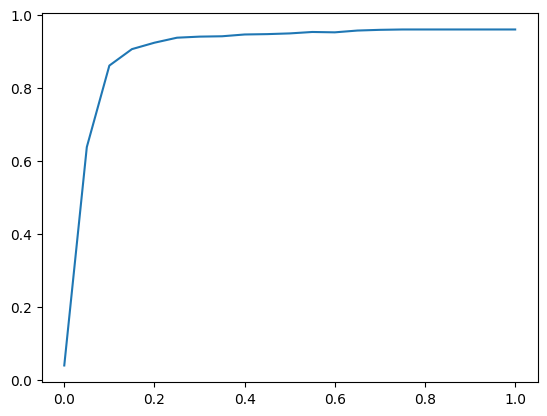

In [75]:
plt.plot(thresholds,scores)

In [76]:
from sklearn .metrics import accuracy_score

In [77]:
accuracy_score(y_val, y_pred >=0.5)

0.949119373776908

In [83]:
test_dicts = df_test.to_dict(orient='records')

In [84]:
X_test = dv.transform(test_dicts)

In [78]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from math import sqrt

In [80]:
alpha_values = [0, 0.01, 0.1, 1, 10]

In [81]:
rmse_score = {}

In [82]:
for alpha in alpha_values:
    model=Ridge(alpha= alpha, solver = 'sag', random_state=42)
    model.fit(X_train, y_train)

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_

In [86]:
y_pred=model.predict(X_val)

In [87]:
rmse = round(sqrt(mean_squared_error(y_val, y_pred)), 3)
rmse_score[alpha] = rmse

In [89]:
for alpha, rmse in rmse_score.items():
    print(f'Alpha={alpha}: RMSE ={rmse}')

Alpha=10: RMSE =0.192


In [93]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction import DictVectorizer

# Assuming df_full_train is your training dataset with features and target

# Define the KFold object with 5 splits, shuffling the data, and setting a random seed
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Initialize a list to store AUC scores for each fold
auc_scores = []

# Initialize DictVectorizer
vectorizer = DictVectorizer()

# Iterate over different folds of df_full_train
for train_index, val_index in kf.split(df_full_train):
    # Split the data into train and validation sets based on the fold indices
    train_data, val_data = df_full_train.iloc[train_index], df_full_train.iloc[val_index]
    
    # Separate the features (X) and the target (y) variables for train and validation
    X_train, y_train = train_data.drop(columns=['stroke']), train_data['stroke']
    X_val, y_val = val_data.drop(columns=['stroke']), val_data['stroke']
    
    # Convert feature dataframes to dictionaries and then use DictVectorizer
    X_train_dict = X_train.to_dict(orient='records')
    X_val_dict = X_val.to_dict(orient='records')
    
    X_train_encoded = vectorizer.fit_transform(X_train_dict)
    X_val_encoded = vectorizer.transform(X_val_dict)
    
    # Initialize and train the Logistic Regression model
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train_encoded, y_train)
    
    # Predict probabilities on the validation set
    y_pred_proba = model.predict_proba(X_val_encoded)[:, 1]
    
    # Calculate the AUC score and append it to the list
    auc_score = roc_auc_score(y_val, y_pred_proba)
    auc_scores.append(auc_score)

# Calculate and print the mean AUC score across all folds
mean_auc = sum(auc_scores) / len(auc_scores)
print("Mean AUC:", mean_auc)

Mean AUC: 0.6450118066350581


In [94]:
# Define the C values to iterate over
C_values = [0.01, 0.1, 0.5, 10]

# Initialize KFold with the same parameters as previously
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Initialize lists to store mean and std scores
mean_scores = []
std_scores = []

# Iterate over different C values
for C in C_values:
    # Initialize a list to store AUC scores for each fold
    auc_scores = []
    
    # Iterate over different folds of df_full_train
    for train_index, val_index in kf.split(df_full_train):
        # Split the data into train and validation sets based on the fold indices
        train_data, val_data = df_full_train.iloc[train_index], df_full_train.iloc[val_index]

        # Separate the features (X) and the target (y) variables for train and validation
        X_train, y_train = train_data.drop(columns=['stroke']), train_data['stroke']
        X_val, y_val = val_data.drop(columns=['stroke']), val_data['stroke']

        # Convert feature dataframes to dictionaries and then use DictVectorizer
        X_train_dict = X_train.to_dict(orient='records')
        X_val_dict = X_val.to_dict(orient='records')

        X_train_encoded = vectorizer.fit_transform(X_train_dict)
        X_val_encoded = vectorizer.transform(X_val_dict)

        # Initialize and train the Logistic Regression model with the current C value
        model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        model.fit(X_train_encoded, y_train)

        # Predict probabilities on the validation set
        y_pred_proba = model.predict_proba(X_val_encoded)[:, 1]

        # Calculate the AUC score and append it to the list
        auc_score = roc_auc_score(y_val, y_pred_proba)
        auc_scores.append(auc_score)
    
    # Calculate the mean and standard deviation of AUC scores for the current C value
    mean_auc = np.mean(auc_scores)
    std_auc = np.std(auc_scores)
    
    # Append the mean and std scores to the respective lists (rounded to 3 decimal digits)
    mean_scores.append(round(mean_auc, 3))
    std_scores.append(round(std_auc, 3))

# Print the results for each C value
for i, C in enumerate(C_values):
    print(f"C = {C}: Mean AUC = {mean_scores[i]}, Std = {std_scores[i]}")

C = 0.01: Mean AUC = 0.625, Std = 0.039
C = 0.1: Mean AUC = 0.641, Std = 0.068
C = 0.5: Mean AUC = 0.646, Std = 0.078
C = 10: Mean AUC = 0.63, Std = 0.054


In [100]:
import pickle

In [95]:
output_file = f'model_C={C}.bin'
output_file

'model_C=10.bin'

In [96]:
f_out = open(output_file, 'wb')
pickle.dump((dv, model), f_out)
f_out.close()

In [101]:
customer={'id': 45701,
 'gender': 'female',
 'age': 72.0,
 'hypertension': 0,
 'heart_disease': 1,
 'ever_married': 'no',
 'work_type': 'self-employed',
 'Residence_type': 'rural',
 'avg_glucose_level': 124.38,
 'bmi': 23.4,
 'smoking_status': 'formerly_smoked'}

In [102]:
model_file = 'model_C=10.bin'

In [103]:
with open(model_file, 'rb') as f_in:
    dv, model = pickle.load(f_in)

In [104]:
dv, model



(DictVectorizer(sparse=False),
 LogisticRegression(C=10, max_iter=1000, solver='liblinear'))

In [105]:
 X =dv.transform([customer])

In [106]:
 model.predict_proba(X)[0,1]

0.07810133532409126